In [1]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim

In [2]:
from gensim.models import CoherenceModel
import gensim.corpora as corpora

In [3]:
titles=["SPb", "Sochi", "UBK"]

In [4]:
data_list=[]
for i in range(0, len(titles)):
    title=titles[i]
    fname=title+"reviews_tokenized.csv"
    data=pd.read_csv(fname)
    data.text=data.text.astype('str')
    data_list.append(data)

In [5]:
data_list[0].head(10)

,reference,user,mark,time_delta,text,conv_date
0,https://tophotels.ru/hotel/al32924/reviews,1457319,4,9,добрый день проживать отель 02 02 09 02 состав...,2020-02-18
1,https://tophotels.ru/hotel/al32924/reviews,1983076,5,365,останавливаться отель муж сентябрь 2017 год от...,2020-09-02
2,https://tophotels.ru/hotel/al32924/reviews,1983795,4,10,останавливаться ранее отель точный пристройка ...,2020-12-01
3,https://tophotels.ru/hotel/al32924/reviews,544802,4,0,веление судьба поселить фонтанка фонтанка свой...,2019-11-27
4,https://tophotels.ru/hotel/al32924/reviews,1941390,4,365,приехать подруга турагенство 3 день автобус пе...,2019-09-26
5,https://tophotels.ru/hotel/al32924/reviews,1713582,4,60,отель два деловой поездка отель выбрать органи...,2019-07-27
6,https://tophotels.ru/hotel/al32924/reviews,479059,5,120,март сердце попроситься берег нева выбор отель...,2019-07-27
7,https://tophotels.ru/hotel/al32924/reviews,74932,3,3,отель азимут проводиться конференция лкм поэто...,2019-05-26
8,https://tophotels.ru/hotel/al32924/reviews,1546174,5,150,ездить отель часто останавливаться работа пара...,2019-06-05
9,https://tophotels.ru/hotel/al32924/reviews,1822968,4,365,азимут поехать путёвка два ребёнок трансфер эк...,2019-04-18


In [6]:
docs=pd.concat([data_list[0].text,data_list[1].text,data_list[2].text], axis=0, ignore_index=True) #все отзывы в одну кучу

In [7]:
docs=docs.apply(lambda x: x.split())

In [8]:
docs.head(10)

0    [добрый, день, проживать, отель, 02, 02, 09, 0...
1    [останавливаться, отель, муж, сентябрь, 2017, ...
2    [останавливаться, ранее, отель, точный, пристр...
3    [веление, судьба, поселить, фонтанка, фонтанка...
4    [приехать, подруга, турагенство, 3, день, авто...
5    [отель, два, деловой, поездка, отель, выбрать,...
6    [март, сердце, попроситься, берег, нева, выбор...
7    [отель, азимут, проводиться, конференция, лкм,...
8    [ездить, отель, часто, останавливаться, работа...
9    [азимут, поехать, путёвка, два, ребёнок, транс...
Name: text, dtype: object

In [9]:
bigram = gensim.models.Phrases(docs, min_count=5, threshold=100) #настроить threshold
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [10]:
data_bigrams=[bigram_mod[w] for w in docs]

In [11]:
len(data_bigrams)

13369

In [12]:
len(bigram.vocab)

822216

In [13]:
data_bigrams[10][:20]

['чисто',
 'питание',
 'шведский_стол',
 'кормить',
 'отлично',
 'весь',
 'это',
 'единственный',
 'гостиница',
 'который',
 'настоящий',
 'высыпаться',
 'последний',
 'год',
 '5',
 'кажется',
 'новый',
 'хороший',
 'матрас',
 'очень']

In [14]:
id2word = corpora.Dictionary(data_bigrams)

In [15]:
id2word.filter_extremes(no_below=5,no_above=0.02)

In [16]:
len(id2word)

13575

In [17]:
corpus = [id2word.doc2bow(text) for text in data_bigrams]

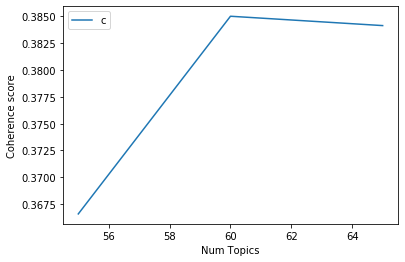

In [117]:
limit=70; start=55; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
n_topics=25
lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=n_topics, 
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True)

In [19]:
#n=0 #best number of topics is on n-th step
#lda_model=model_list[n]
#n_topics=55
topics=lda_model.show_topics(num_topics=n_topics, num_words=100,formatted=False)


In [20]:
def plotWordCloud(topic_number, topics):
    """
        Строит визуализацию слов на основе текстов топиков
    """
    # получаем частоты и слова топика
    
    text = dict(topics[topic_number][1])
    
    # строим облако слов
    wordcloud = WordCloud(background_color="white", max_words=40, width=900, height=900, collocations=False,
                          relative_scaling=1)#,min_font_size=14,max_font_size=84)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10, 10))
    plt.title("Топик номер {}".format(topic_number))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


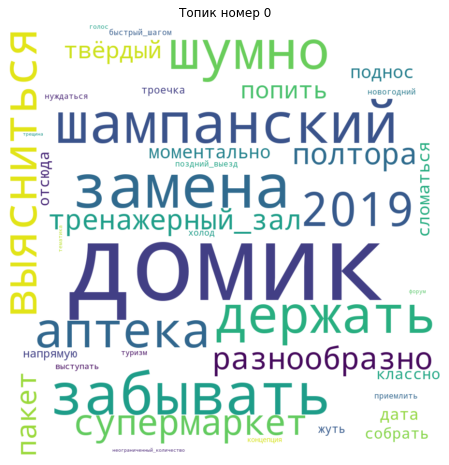

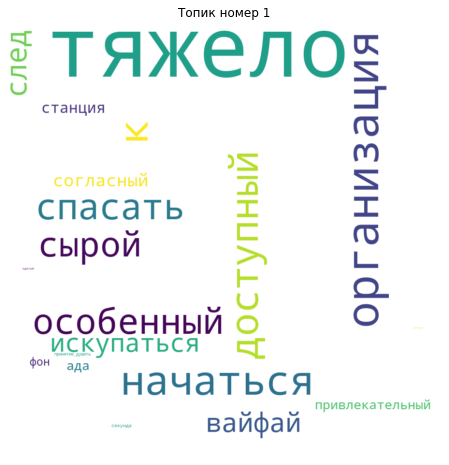

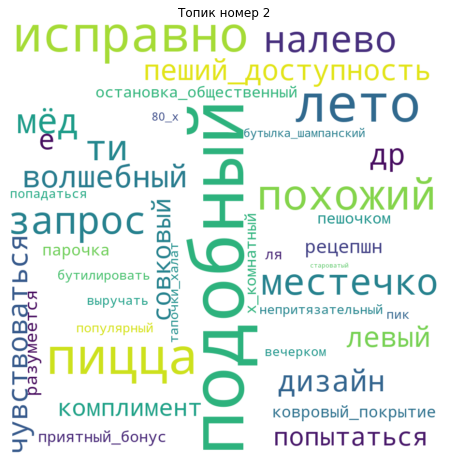

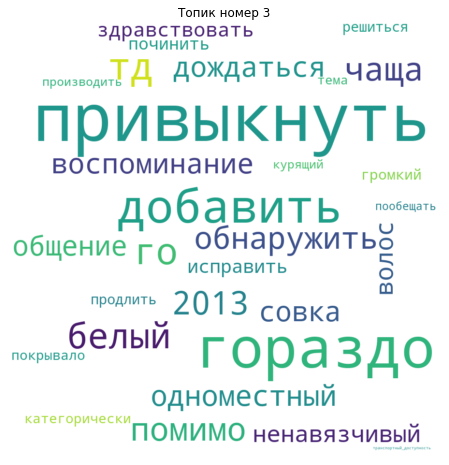

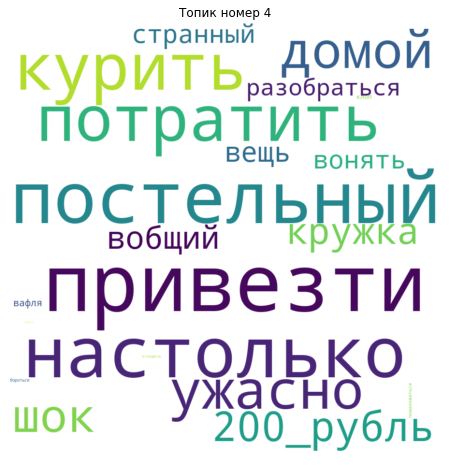

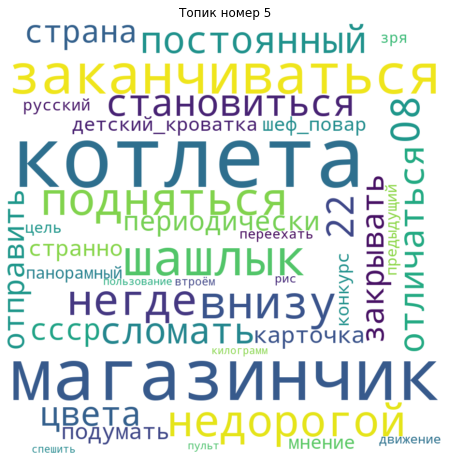

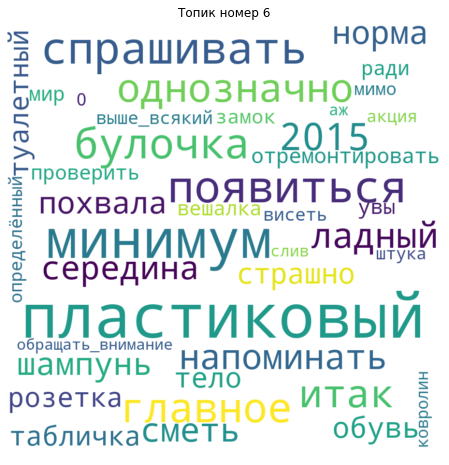

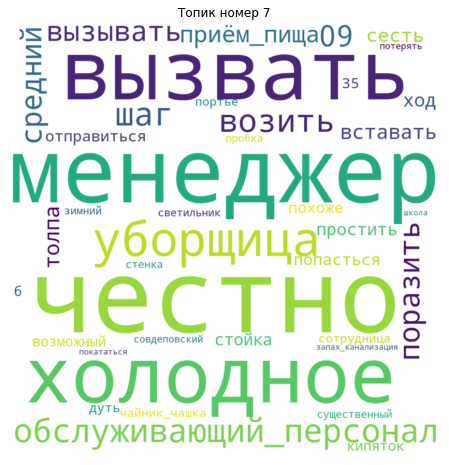

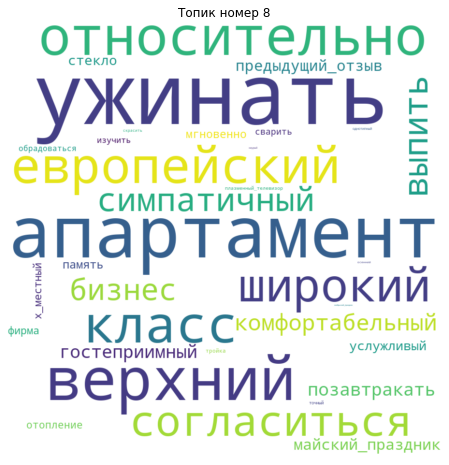

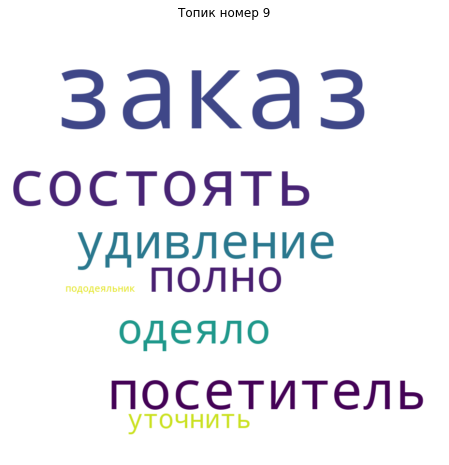

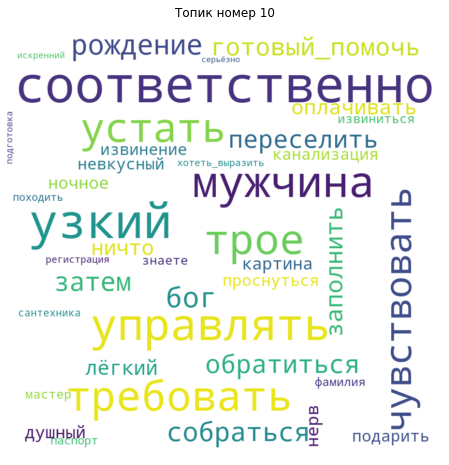

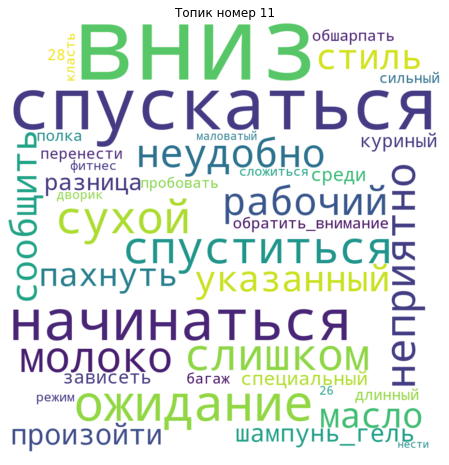

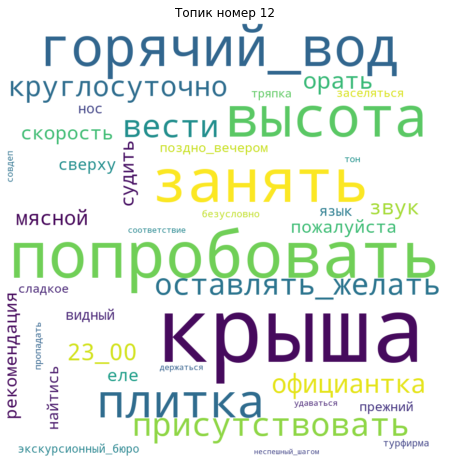

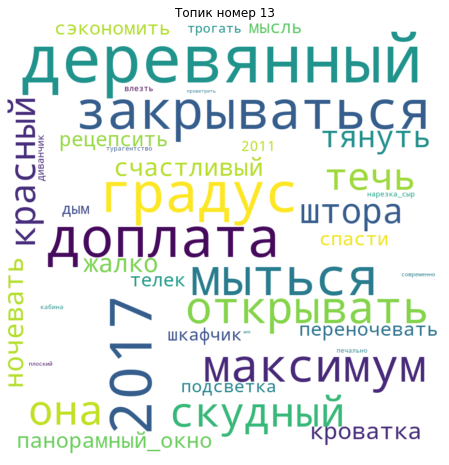

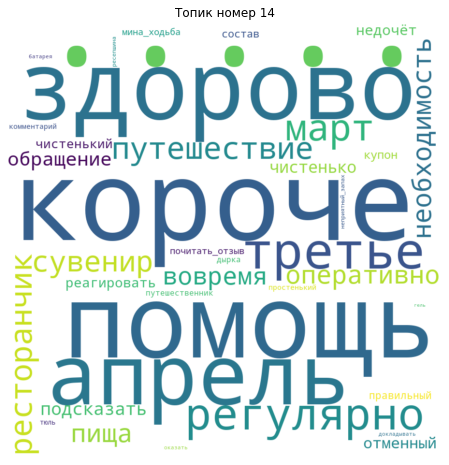

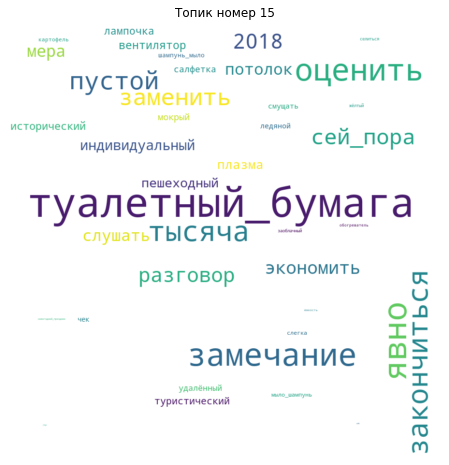

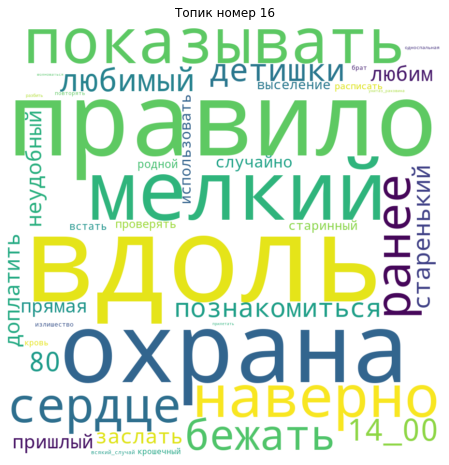

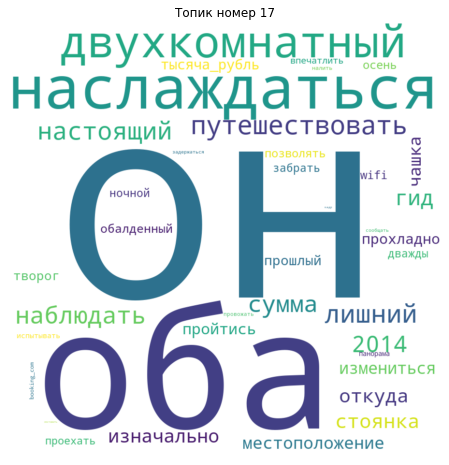

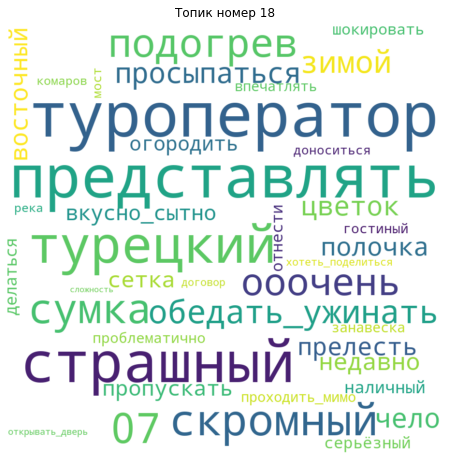

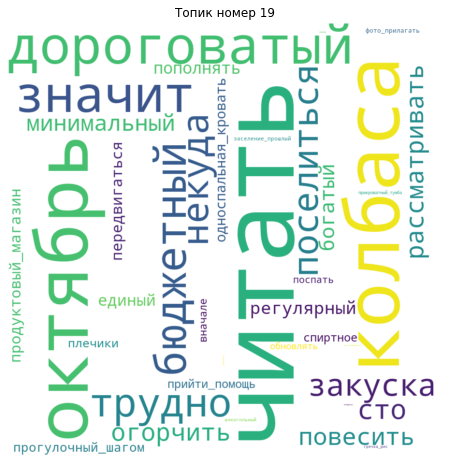

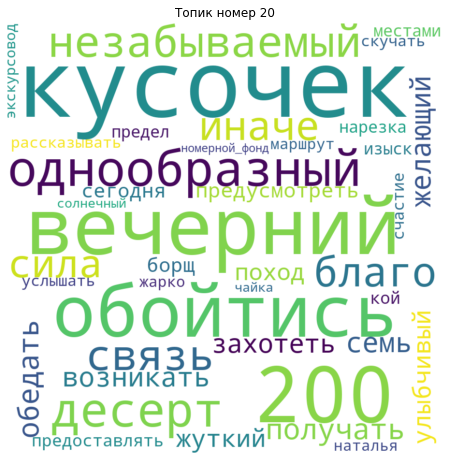

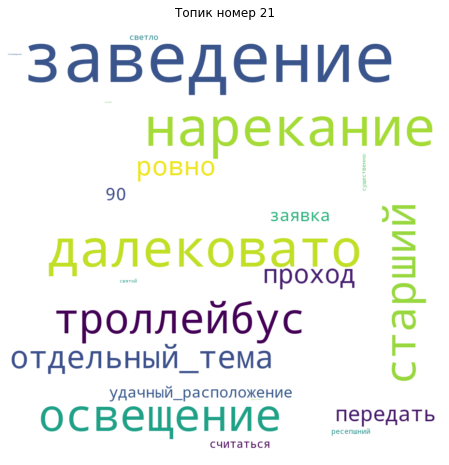

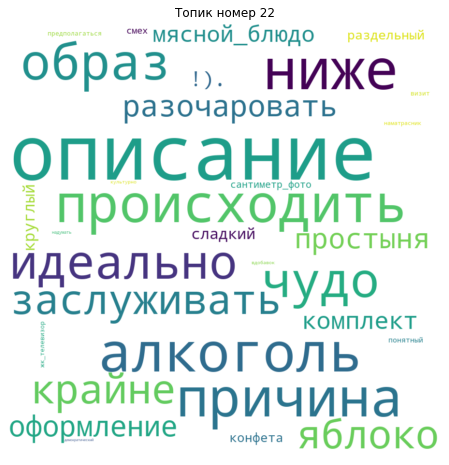

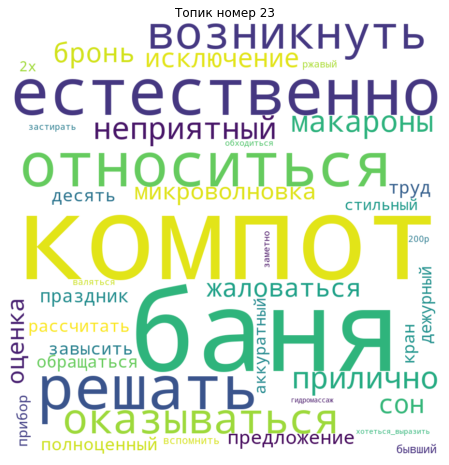

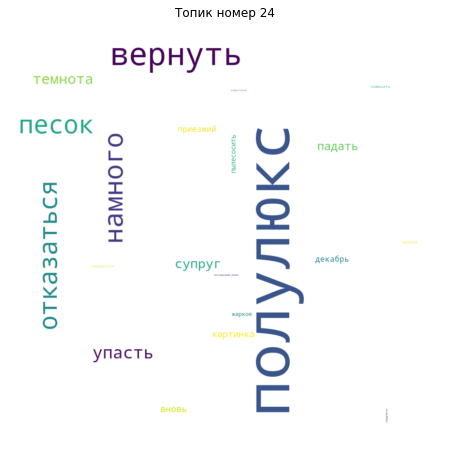

In [133]:
for i in range(0,n_topics):
    plotWordCloud(i,topics)